### Notes:

This Note book shows the calculation and plots for Figure.

In [1]:
import networkx as nx
import numpy as np
from matplotlib import pyplot as plt
from scipy.spatial.distance import cosine
import math 
from numpy.linalg import norm
from matplotlib import animation
from os import listdir
from skimage.io import imread, imsave
import imageio
import pandas as pd
import seaborn as sns
import os

import math
import numpy as np
from scipy.spatial.distance import cosine
from numpy.linalg import norm
import scipy.stats as stats

import pipe_util2

In [ ]:
def d_s_calc(df):
    # tumor center displacement from center
    s = ((df.x.mean()-128)**2+(df.y.mean()-128)**2)**0.5
    s = np.round(s, 2)

    # -----------------------------------------------------

    # average single cell displacment from center
    d = (((df.x-128)**2+(df.y-128)**2)**0.5).mean()
    d = np.round(d, 2)
    d_std = (((df.x-128)**2+(df.y-128)**2)**0.5).std()
    d_std = np.round(d_std, 2)
    return d, d_std, s

from scipy.spatial import ConvexHull

def PolyArea(x,y):
    return 0.5*np.abs(np.dot(x,np.roll(y,1))-np.dot(y,np.roll(x,1)))

def area_calc(df):
    # calc tumor area with convex hall
    points = np.array([df.x, df.y]).T
    hull = ConvexHull(points)
    vetices = points[hull.vertices]
    ara = PolyArea(points[hull.vertices,0],points[hull.vertices,1])
    ara_frac = ara/256/256.
    #ara_frac = np.round(ara_frac, 2)
    return ara_frac
            
def time_series(folder, start, end):
    # calculate time series of microtumor migration
    
    folder = pipe_util2.folder_verify(folder)
    files = pipe_util2.folder_file_num(folder, "txt")[start:end]
    
    print(len(files))
    
    d_time = []
    d_std_time = []
    s_time = []
    area_time = []
    rac_time = []
    ang_std_time = []
    ang_mean_time = []
    
    i = 0
    while i<len(files):
        df = pd.read_csv(files[i])
        #print(df.columns)
        d, d_std, s = d_s_calc(df)
        ara_frac = area_calc(df)

        fpx = df.x_self_polarity
        fpy = df.y_self_polarity
        ang = np.arctan2(fpx, fpy)
        ang_std = np.round(np.std(ang),2)
        ang_mean = np.round(np.mean(ang),2)

        d_time.append(d)
        d_std_time.append(d_std)
        s_time.append(s)
        area_time.append(ara_frac)
        rac_time.append(df.rac.mean())

        ang_std_time.append(ang_std)
        ang_mean_time.append(ang_mean)
        
        f_avg = df.f.mean()
        f_max = df.f.max()
        i = i+1
        
    df = pd.DataFrame({
        "d_time": d_time,
        "d_std_time": d_std_time,
        "s_time": s_time,
        "area_time": area_time,
        "rac_time": rac_time,
        "ang_std_time": ang_std_time,
        "ang_mean_time": ang_mean_time,
        
        "f_avg": f_avg,
        "f_max": f_max
        
    })
    return df

In [27]:
folder = "./Results/" # Save the picutures

dir_folder = "Directional/"
dir_df = time_series(dir_folder, 0, 270)

rad_folder = "Radial/"
rad_df = time_series(rad_folder, 0, 270)

Directional/ has 270 files
270
Radial/ has 270 files
270


In [28]:
dir_df.head(3)

,d_time,d_std_time,s_time,area_time,rac_time,ang_std_time,ang_mean_time,f_avg,f_max
0,28.96,10.65,3.66,0.080739,10.0,1.84,0.15,153.793708,217.258173
1,29.00,10.64,3.65,0.080861,10.0,1.85,0.08,153.793708,217.258173
2,29.03,10.65,3.66,0.081064,10.0,1.89,0.12,153.793708,217.258173


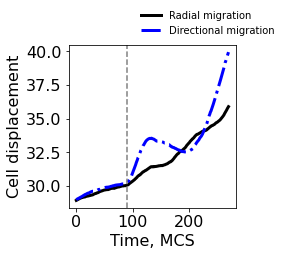

In [29]:
fig = plt.figure(figsize = (3,3))
ax = fig.add_subplot(111)

colors = plt.cm.rainbow(np.linspace(0.1,1,2))

plt.plot(rad_df.d_time, "-", c = "k", lw = 3, label = "Radial migration")
plt.plot(dir_df.d_time, "-.", c = "b", lw = 3,label = "Directional migration")
plt.axvline(x=90, c = "grey", ls = "--")

ax.tick_params(axis='x', labelsize=16)  # only affects
ax.tick_params(axis='y', labelsize=16)  # tick labels

plt.xlabel("Time, MCS", fontsize = 16)

plt.legend(fontsize = 10, frameon=False,
           bbox_to_anchor=(0.38, 1.))

plt.ylabel("Cell displacement", fontsize = 16)

plt.savefig(folder+"Cell displacement.pdf", dpi = 200, bbox_inches = "tight")

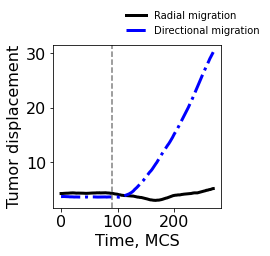

In [30]:
fig = plt.figure(figsize = (3,3))
ax = fig.add_subplot(111)

colors = plt.cm.rainbow(np.linspace(0.1,1,2))

plt.plot(rad_df.s_time, "-", c = "k", lw = 3, label = "Radial migration")
plt.plot(dir_df.s_time, "-.", c = "b", lw = 3,label = "Directional migration")
plt.axvline(x=90, c = "grey", ls = "--")

ax.tick_params(axis='x', labelsize=16)  # only affects
ax.tick_params(axis='y', labelsize=16)  # tick labels

plt.xlabel("Time, MCS", fontsize = 16)

plt.legend(fontsize = 10, frameon=False,
           bbox_to_anchor=(0.38, 1))

plt.ylabel("Tumor displacement", fontsize = 16)

plt.savefig(folder+"Tumor displacement.pdf", dpi = 200, bbox_inches = "tight")

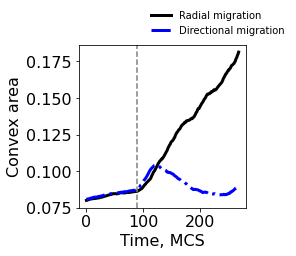

In [31]:
fig = plt.figure(figsize = (3,3))
ax = fig.add_subplot(111)

colors = plt.cm.rainbow(np.linspace(0.1,1,2))

plt.plot(rad_df.area_time, "-", c = "k", lw = 3, label = "Radial migration")
plt.plot(dir_df.area_time, "-.", c = "b", lw = 3,label = "Directional migration")
plt.axvline(x=90, c = "grey", ls = "--")

ax.tick_params(axis='x', labelsize=16)  # only affects
ax.tick_params(axis='y', labelsize=16)  # tick labels

plt.xlabel("Time, MCS", fontsize = 16)

plt.legend(fontsize = 10, frameon=False,
           bbox_to_anchor=(0.38, 1.))

plt.ylabel("Convex area", fontsize = 16)

plt.savefig(folder+"Convex area.pdf", dpi = 200, bbox_inches = "tight")

# Plot angles force polarity

In [32]:
import matplotlib.pyplot as plt
import numpy as np

rad_final_csv = "Radial/390_a_1_0_s_4_0_record.txt"
dir_final_csv = "Directional/390_a_1_0_s_4_0_record.txt"

rad_final_df = pd.read_csv(rad_final_csv)
dir_final_df = pd.read_csv(dir_final_csv)
rad_final_df

,cell_id,x,y,x_self_polarity,y_self_polarity,a,s,rac,f,f_x,f_y,fpp,f_coef,p_frac
0,1,140.979167,91.333333,0.983771,-0.179431,1.0,3.787822,47.878217,100.862138,-99.225202,18.097798,20,0.672414,0.008
1,2,143.342857,87.485714,0.970121,-0.242620,1.0,3.975115,49.751148,105.793473,-102.632506,25.667635,20,0.705290,0.008
2,3,118.530612,98.632653,-0.949273,0.314454,1.0,3.859599,48.595990,102.808241,97.593053,-32.328475,20,0.685388,0.008
3,4,139.521739,74.304348,0.282362,-0.959308,1.0,4.120272,51.202719,109.293606,-30.860395,104.846213,20,0.728624,0.008
4,5,153.133333,93.355556,0.987286,0.158954,1.0,3.866320,48.663201,102.986872,-101.677500,-16.370146,20,0.686579,0.008
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
133,134,175.666667,153.666667,-0.252543,-0.967586,1.0,3.937498,49.374985,104.841080,26.476862,101.442732,20,0.698941,0.008
134,135,160.531915,162.638298,0.993929,0.110025,1.0,4.111327,51.113272,109.085841,-108.423560,-12.002179,20,0.727239,0.008
135,136,117.513514,165.459459,0.996236,-0.086682,1.0,4.105421,51.054214,108.948101,-108.538024,9.443830,20,0.726321,0.008
136,137,113.543478,173.869565,-0.999992,-0.004045,1.0,4.086509,50.865091,108.503989,108.503101,0.438929,20,0.723360,0.008


<Figure size 360x360 with 0 Axes>

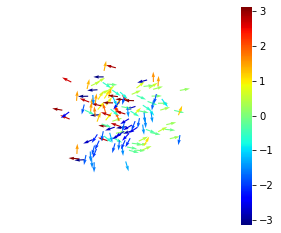

In [33]:
plt.figure(figsize = (5,5))
X = rad_final_df.x
Y = rad_final_df.y

px = rad_final_df.x_self_polarity
py = rad_final_df.y_self_polarity
ang = np.arctan2(py, px)
ang_std = np.round(np.std(ang),2)
ang_mean = np.round(np.mean(ang),2)

import matplotlib
norm = matplotlib.colors.Normalize()
norm.autoscale(ang)
cm = matplotlib.cm.jet
sm = matplotlib.cm.ScalarMappable(cmap=cm, norm=norm)
sm.set_array([])

fig, ax = plt.subplots()
q = ax.quiver(X, Y, rad_final_df.x_self_polarity, rad_final_df.y_self_polarity, ang, cmap = "jet")
ax.set_aspect("equal")
cb = plt.colorbar(sm)
cb.outline.set_visible(False)
plt.axis("off")
plt.xlim((0,256))
plt.ylim((0,256))
plt.savefig(folder + "rad_force_dir.pdf", dpi = 200)
plt.show()

<Figure size 360x360 with 0 Axes>

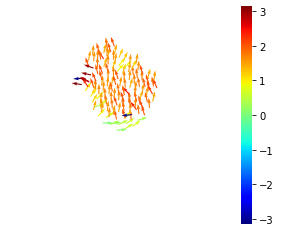

In [34]:
plt.figure(figsize = (5,5))
X = dir_final_df.x
Y = dir_final_df.y

px = dir_final_df.x_self_polarity
py = dir_final_df.y_self_polarity
ang = np.arctan2(py, px)
ang_std = np.round(np.std(ang),2)
ang_mean = np.round(np.mean(ang),2)

import matplotlib
norm = matplotlib.colors.Normalize()
norm.autoscale([-3.14, 3.14])
cm = matplotlib.cm.jet
sm = matplotlib.cm.ScalarMappable(cmap=cm, norm=norm)
sm.set_array([])

fig, ax = plt.subplots()
q = ax.quiver(X, Y, dir_final_df.x_self_polarity, dir_final_df.y_self_polarity, ang, cmap = "jet")
ax.set_aspect("equal")
cb = plt.colorbar(sm)
cb.outline.set_visible(False)
plt.axis("off")
plt.xlim((0,256))
plt.ylim((0,256))
plt.savefig(folder + "dir_force_dir.pdf", dpi = 200)
plt.show()

# Plot cell polarity

In [37]:
def normalize(v):
    norm = np.linalg.norm(v)
    if norm == 0:
        return v
    return v / norm

In [35]:
import matplotlib.pyplot as plt
import numpy as np

rad_final_csv = "Radial/390_a_1_0_s_4_0_record.txt"
rad_prev_csv = "Radial/385_a_1_0_s_4_0_record.txt"
dir_final_csv = "Directional/390_a_1_0_s_4_0_record.txt"
dir_prev_csv = "Directional/385_a_1_0_s_4_0_record.txt"

rad_final_df = pd.read_csv(rad_final_csv)
rad_prev_df = pd.read_csv(rad_prev_csv)
dir_final_df = pd.read_csv(dir_final_csv)
dir_prev_df = pd.read_csv(dir_prev_csv)
rad_final_df

,cell_id,x,y,x_self_polarity,y_self_polarity,a,s,rac,f,f_x,f_y,fpp,f_coef,p_frac
0,1,140.979167,91.333333,0.983771,-0.179431,1.0,3.787822,47.878217,100.862138,-99.225202,18.097798,20,0.672414,0.008
1,2,143.342857,87.485714,0.970121,-0.242620,1.0,3.975115,49.751148,105.793473,-102.632506,25.667635,20,0.705290,0.008
2,3,118.530612,98.632653,-0.949273,0.314454,1.0,3.859599,48.595990,102.808241,97.593053,-32.328475,20,0.685388,0.008
3,4,139.521739,74.304348,0.282362,-0.959308,1.0,4.120272,51.202719,109.293606,-30.860395,104.846213,20,0.728624,0.008
4,5,153.133333,93.355556,0.987286,0.158954,1.0,3.866320,48.663201,102.986872,-101.677500,-16.370146,20,0.686579,0.008
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
133,134,175.666667,153.666667,-0.252543,-0.967586,1.0,3.937498,49.374985,104.841080,26.476862,101.442732,20,0.698941,0.008
134,135,160.531915,162.638298,0.993929,0.110025,1.0,4.111327,51.113272,109.085841,-108.423560,-12.002179,20,0.727239,0.008
135,136,117.513514,165.459459,0.996236,-0.086682,1.0,4.105421,51.054214,108.948101,-108.538024,9.443830,20,0.726321,0.008
136,137,113.543478,173.869565,-0.999992,-0.004045,1.0,4.086509,50.865091,108.503989,108.503101,0.438929,20,0.723360,0.008


<Figure size 360x360 with 0 Axes>

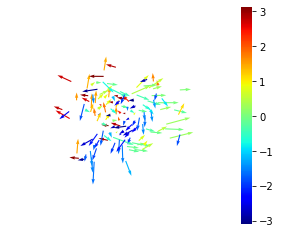

In [38]:
plt.figure(figsize = (5,5))
X = rad_final_df.x
Y = rad_final_df.y

px = X - rad_prev_df.x
py = Y - rad_prev_df.y

norms = normalize([px, py])
px_norm = norms[0]
py_norm = norms[1]
        
ang = np.arctan2(py, px)
ang_std = np.round(np.std(ang),2)
ang_mean = np.round(np.mean(ang),2)

import matplotlib
norm = matplotlib.colors.Normalize()
norm.autoscale(ang)
cm = matplotlib.cm.jet
sm = matplotlib.cm.ScalarMappable(cmap=cm, norm=norm)
sm.set_array([])

fig, ax = plt.subplots()
q = ax.quiver(X, Y, px_norm, py_norm, ang, cmap = "jet")
ax.set_aspect("equal")
cb = plt.colorbar(sm)
cb.outline.set_visible(False)
plt.axis("off")
plt.xlim((0,256))
plt.ylim((0,256))
plt.savefig(folder + "rad_cell_dir.pdf", dpi = 200)
plt.show()

<Figure size 360x360 with 0 Axes>

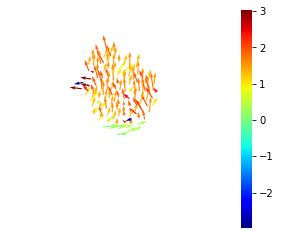

In [39]:
plt.figure(figsize = (5,5))
X = dir_final_df.x
Y = dir_final_df.y

px = X - dir_prev_df.x
py = Y - dir_prev_df.y

norms = normalize([px, py])
px_norm = norms[0]
py_norm = norms[1]
        
ang = np.arctan2(py, px)
ang_std = np.round(np.std(ang),2)
ang_mean = np.round(np.mean(ang),2)

import matplotlib
norm = matplotlib.colors.Normalize()
norm.autoscale(ang)
cm = matplotlib.cm.jet
sm = matplotlib.cm.ScalarMappable(cmap=cm, norm=norm)
sm.set_array([])

fig, ax = plt.subplots()
q = ax.quiver(X, Y, px_norm, py_norm, ang, cmap = "jet")
ax.set_aspect("equal")
cb = plt.colorbar(sm)
cb.outline.set_visible(False)
plt.axis("off")
plt.xlim((0,256))
plt.ylim((0,256))
plt.savefig(folder + "dir_cell_dir.pdf", dpi = 200)
plt.show()